# Exploratory Data Analysis
 
 Following scraping data, we clean and explore the relationships between variables

## Cleaning the data

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [102]:
df=pd.read_pickle('./FullVGChartzDatabase.zip',compression = 'zip')

In [103]:
# Turn all N/A's into np.nan values so pandas can operate with them easily
df_obj = df.select_dtypes('object')
df[df.columns] = df_obj.apply(lambda x: x.str.strip())
df=df.replace('N/A',np.nan)

In [104]:
# Merge columns total sales and total shipped because they describe the same thing but one is \
# for games no longer in production
df['total_shipped'].fillna(df['total_sales'],inplace = True)
df.dropna(subset=['total_shipped'],inplace = True)
df.drop(columns = ['total_sales'],inplace = True)

In [105]:
df.columns

Index(['position', 'game', 'console', 'publisher', 'developer',
       'vgchart_score', 'critic_score', 'user_score', 'total_shipped',
       'na_sales', 'pal_sales', 'japan_sales', 'other_sales', 'release_date',
       'last_update'],
      dtype='object')

In [106]:
# Cut the m from millions
#df['total_shipped'] = df['total_shipped'].str[:-1].astype(float)


In [107]:
def drop_m(df,column_name):
    if column_name not in df.columns:
        return 'Cannot find column in dataframe!'
    df[column_name].loc[df[column_name].notnull()] = df[column_name].loc[df[column_name].notnull()].str[:-1].astype(float)
    return True

In [108]:
drop_m(df,'total_shipped')
drop_m(df,'pal_sales')
drop_m(df,'na_sales')
drop_m(df,'japan_sales')
drop_m(df,'other_sales')




/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


True

In [109]:
df[0:20]

,position,game,console,publisher,developer,vgchart_score,critic_score,user_score,total_shipped,na_sales,pal_sales,japan_sales,other_sales,release_date,last_update
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,19th Nov 06,NaN
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,NaN,10.0,8.2,40.24,NaN,NaN,NaN,NaN,18th Oct 85,NaN
2,3,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.7,8.2,9.1,37.14,NaN,NaN,NaN,NaN,27th Apr 08,11th Apr 18
3,4,PlayerUnknown's Battlegrounds,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,21st Dec 17,13th Nov 18
4,5,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,8.8,8.0,8.8,33.09,NaN,NaN,NaN,NaN,26th Jul 09,NaN
5,6,Pokémon Red / Green / Blue Version,GB,Nintendo,Game Freak,NaN,9.4,NaN,31.38,NaN,NaN,NaN,NaN,30th Sep 98,NaN
6,7,New Super Mario Bros.,DS,Nintendo,Nintendo EAD,NaN,9.1,8.1,30.80,NaN,NaN,NaN,NaN,15th May 06,NaN
7,8,Tetris,GB,Nintendo,Bullet Proof Software,NaN,NaN,NaN,30.26,NaN,NaN,NaN,NaN,01st Jun 89,NaN
8,9,New Super Mario Bros. Wii,Wii,Nintendo,Nintendo EAD,9.1,8.6,9.2,30.22,NaN,NaN,NaN,NaN,15th Nov 09,NaN
9,10,Minecraft,PC,Mojang,Mojang AB,NaN,10.0,NaN,30.01,NaN,NaN,NaN,NaN,10th May 10,05th Aug 18


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


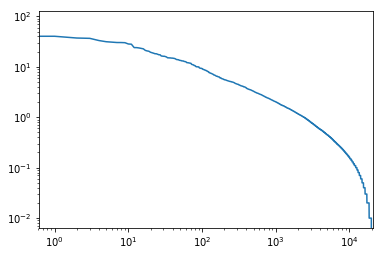

In [114]:
df['total_shipped'].plot(loglog = True)